In [1]:
# %load_ext autoreload
# %autoreload 2
from class_new import *
from class_new import *
import class_new
import importlib
importlib.reload(class_new)

ModuleNotFoundError: No module named 'class_new'

In [1]:
import tensorflow

In [2]:
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7355218187818180354,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3048682292
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14710268187060555033
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:26:00.0, compute capability: 7.5"]

In [4]:
# import import_ipynb

import sys
sys.path.append('C:/Users/GJ/PycharmProjects/2022SPCUP')


from class_new import *
import class_new
import importlib
importlib.reload(class_new)

import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, UpSampling2D, Input, Convolution2D, Reshape

known_volume_path = './part2_full_train_4X5000'
unknown_volume_path = './unseen_noisy_4X1000'




rs = 10
known_path, known_labels = part2_file_path_list(known_volume_path,label = True)
unknown_path, unknown_labels = part2_file_path_list(unknown_volume_path,label = False)

# print(known_path)
print(known_labels.shape)
print(unknown_labels.shape)

all_path = np.concatenate((known_path,unknown_path),axis = 0)
all_labels = np.concatenate((known_labels,unknown_labels),axis = 0)
print(all_labels.shape)


##train set
# print('raw train_set_num :',len(labels))
X_train_path, X_test_path, y_train_raw, y_test_raw = train_test_split(all_path,
                                                                      all_labels, test_size=0.2,
                                                                      stratify = all_labels, random_state=rs)


n_mels = 64
samplint_rate = 16000
# train = classes.data(X_train_path, y_train_raw, n_mels=n_mels, known = True)
# # X_train,y_train = train.extract_mel(sampling_rate,n_mels)
#
# test = classes.data(X_test_path, y_test_raw, n_mels=n_mels, known = True)
# # X_test,y_test = test.extract_mel(sampling_rate,n_mels)
#
# unseen = data(unknown_path, unknown_labels, n_mels=n_mels, known = False)

# n = -1
train = data(X_train_path,y_train_raw,n_mels=n_mels, known = True)

test = data(X_test_path,y_test_raw, n_mels=n_mels, known = True)

train.extract_mel()
test.extract_mel()
train.extract_cqt()
test.extract_cqt()









(20000,)
(4000,)
(24000,)


AttributeError: 'data' object has no attribute 'X_reshaped'

In [10]:
train.X_mel_cqt.shape
train.y_reshaped = to_categorical(train.y_split)
test.y_reshaped = to_categorical(test.y_split)


In [ ]:
train.reshape_data_cqt_mel()
test.reshape_data_cqt_mel()

In [2]:
print(train)
print(test)

NameError: name 'train' is not defined

In [11]:
import pickle
with open('part2_train_rs10_nmels64+cqt(train5000x4+unseen1000x4).p','wb') as f:
    pickle.dump(train,f)
with open('part2_testrs10_rs10_nmels64+cqt(train5000x5+unseen1000x4).p','wb') as f:
    pickle.dump(test,f)

    
    
# with open("part1_label6_train.p", 'rb') as f:
#     train = pickle.load(f)
# with open("part1_label6_test.p", 'rb') as f:
#     test = pickle.load(f) 

PicklingError: Can't pickle <class 'class_new.data'>: it's not the same object as class_new.data

In [ ]:
# X_train = train.X_reshaped
# X_test = test.X_reshaped
# y_train = train.y_reshaped
# y_test = test.y_reshaped
# print(y_train.shape)

In [14]:
test.reshape_data_cqt_mel()

AttributeError: 'data' object has no attribute 'X_reshaped'

In [16]:
X_train = train.X_mel_cqt
X_test = test.X_mel_cqt
y_train = train.y_reshaped
y_test = test.y_reshaped

print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(124002, 64, 32, 2)
(30844, 64, 32, 2)
(30844, 6)


In [19]:
np.save('mel_cqt_X_train.npy',X_train)
np.save('mel_cqt_X_test.npy',X_test)
np.save('mel_cqt_y_train.npy',y_train)
np.save('mel_cqt_y_test.npy',y_test)


# mel_cqt_X_test = np.load('mel_cqt_X_test.npy')
# mel_cqt_X_test.shape

(64, 32, 2)
Epoch 1/1000
776/776 [==============================] - 124s 151ms/step - loss: 0.7979 - accuracy: 0.7141 - val_loss: 0.5123 - val_accuracy: 0.8121
Epoch 2/1000
776/776 [==============================] - 114s 146ms/step - loss: 0.2899 - accuracy: 0.8866 - val_loss: 0.2682 - val_accuracy: 0.8953
Epoch 3/1000
776/776 [==============================] - 115s 149ms/step - loss: 0.1969 - accuracy: 0.9215 - val_loss: 0.2356 - val_accuracy: 0.9084
Epoch 4/1000
776/776 [==============================] - 116s 149ms/step - loss: 0.1608 - accuracy: 0.9362 - val_loss: 0.1782 - val_accuracy: 0.9315
Epoch 5/1000
776/776 [==============================] - 114s 147ms/step - loss: 0.1297 - accuracy: 0.9491 - val_loss: 0.1859 - val_accuracy: 0.9290
Epoch 6/1000
776/776 [==============================] - 115s 148ms/step - loss: 0.1074 - accuracy: 0.9578 - val_loss: 0.1666 - val_accuracy: 0.9371
Epoch 7/1000
776/776 [==============================] - 114s 147ms/step - loss: 0.0933 - accuracy: 0

Epoch 56/1000
776/776 [==============================] - 112s 145ms/step - loss: 0.0139 - accuracy: 0.9953 - val_loss: 0.2380 - val_accuracy: 0.9564
Epoch 57/1000
776/776 [==============================] - 112s 144ms/step - loss: 0.0163 - accuracy: 0.9946 - val_loss: 0.3698 - val_accuracy: 0.9402
Epoch 58/1000
776/776 [==============================] - 112s 145ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.2899 - val_accuracy: 0.9548
Epoch 59/1000
776/776 [==============================] - 112s 145ms/step - loss: 0.0133 - accuracy: 0.9956 - val_loss: 0.2977 - val_accuracy: 0.9544
Epoch 60/1000
776/776 [==============================] - 112s 145ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.3205 - val_accuracy: 0.9502
Epoch 61/1000
776/776 [==============================] - 112s 145ms/step - loss: 0.0163 - accuracy: 0.9948 - val_loss: 0.2871 - val_accuracy: 0.9541
Epoch 62/1000
776/776 [==============================] - 112s 145ms/step - loss: 0.0158 - accuracy: 0.9947

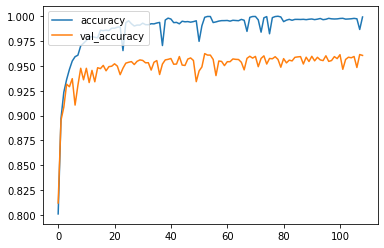

964/964 - 6s - loss: 0.1611 - accuracy: 0.9446
테스트 정확도: 0.9445596933364868
************ mel_spectogram
************ file test_accuracy :  0.990625   n_mels :  64 , hop_length =  1024  , n_fft :  2048
************ X_train.shape :  (124002, 64, 32, 2)
test_set.size :  4800






In [20]:



for n_mels in [64]:
    for hop_length in [1024]:
        for n_fft in [2048]:
            from tensorflow.keras.models import Sequential
            from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D
            from tensorflow.keras.callbacks import EarlyStopping
            from tensorflow.keras.callbacks import ModelCheckpoint

            print((X_train.shape[1:]))
            model = Sequential()
            '''
            #model 1
            model.add(layers.BatchNormalization(input_shape=(X_train.shape[1:])))
            model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Conv2D(filters=128, kernel_size=(5, 5), padding="same", activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
            model.add(MaxPool2D(pool_size=(5, 5)))
            model.add(Flatten())
            model.add(layers.Dense(5, activation='softmax'))
            '''
            #model 2
            model.add(layers.BatchNormalization(input_shape=(X_train.shape[1:])))
            model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
            model.add(layers.BatchNormalization())
            model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
            model.add(MaxPool2D(pool_size=(5, 5)))
            model.add(Flatten())
            model.add(layers.Dense(6, activation=None))
            model.add(layers.Activation('softmax'))


            # 모델 컴파일
            model.compile(optimizer='adam',
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])


            callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=100, mode='auto',restore_best_weights=True), 
                         ModelCheckpoint(filepath=str(n_mels)+"_"+str(hop_length)+"_"+ str(rs) + "_"
                                         + "part2_mel_cqt_feature_label_6_model.h5",
                                         monitor='val_loss', verbose=0, save_best_only=True)]

            classifier = model.fit(X_train,
                                   y_train,
                                   epochs=1000,
                                   batch_size=128, callbacks=callbacks,
                                   validation_split=0.2)

#             model_json = model.to_json()
#             with open("./models_log" + "/" + str(rs) + "_" + "spcup.json", 'w') as json_file:
#                 json_file.write(model_json)
            #             model.save_weights("./models_log" + "/" + str(rs) + "_" + "spcup.h5")
            print("Saved model to disk")


            #             #### json 모델 load
            #             from keras.models import model_from_json
            #             json_file = open("model.json", "r") 
            #             loaded_model_json = json_file.read() 
            #             json_file.close() 
            #             loaded_model = model_from_json(loaded_model_json)

            plt.plot(classifier.history['accuracy'])
            plt.plot(classifier.history['val_accuracy'])
            # plt.plot(classifier.history['loss'])
            # plt.plot(classifier.history['val_loss'])
            plt.legend([ 'accuracy','val_accuracy'], loc = 'upper left')
            plt.show()

            test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

            print('테스트 정확도:', test_acc)

            prediction = model.predict(X_test)




            #######################segment들 합쳐서 파일당 accuracy 계산
            from scipy.stats import mode
            predicted_classes = np.argmax(prediction, axis = 1)
            f = 0
            test_predict=[]
            for i in test.file_split_num:
            #     print(predicted_classes[f:f+i])
                test_predict.append(mode(predicted_classes[f:f+i])[0][0])
                f+=i

            acc_bool = test_predict==y_test_raw
            #             print(test_predict[:100])
            #             print(y_test_raw[:100])
            #             print(acc_bool[:100])
            test_accuracy = acc_bool.tolist().count(True)/len(acc_bool)
            print('************ mel_spectogram')
            print('************ file test_accuracy : ', test_accuracy, '  n_mels : ', n_mels,
                  ', hop_length = ', hop_length,' , n_fft : ',n_fft)
            print('************ X_train.shape : ', X_train.shape)
            print('test_set.size : ', acc_bool.size)
            print('\n\n\n')





In [ ]:
model.save("./best_model_noise" + "/" + str(rs) + "_" + "part2_label6_spcup_save_last.h5")

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test_raw, test_predict)
print('\n\n', cf)

In [ ]:
from tensorflow.keras.models import load_model

# model = load_model('./64_1024_10_part2_mel_feature_label_6_model.h5')
model = load_model('./best_model_noise/10_part2_label6_spcup_save_last.h5')

# model_vec = load_model('./64_1024_10_part2_mel_feature_label_6_model.h5')
model_vec = load_model('./best_model_noise/10_part2_label6_spcup_save_last.h5')

model_vec.pop()
model_vec.compile()
model_vec.summary()

def ext_soft(data, model, model_vec, n_round = 5):
    

    
    prediction_soft = model.predict(data.X_reshaped)
    prediction_vec = model_vec.predict(data.X_reshaped)
    predicted_classes = np.argmax(prediction_soft, axis=1)
    

    
    f = 0
    softmax_val = []
    test_predict = []

    for j,i in enumerate(data.file_split_num):
        mean_vec = np.mean(prediction_vec[f:f + i],axis = 0)    
        mean_soft = np.mean(prediction_soft[f:f + i],axis = 0) 
#         mean_soft = np.mean(prediction[f:f + i],axis = 0)
#         mean_soft = np.mean(np.power(prediction[f:f + i],2),axis = 0)
        
        softmax_val.append(np.round(mean_vec,n_round))
#         test_predict.append(mode(predicted_classes[f:f + i])[0][0])
        test_predict.append(np.argmax(mean_soft))
        
#         predicted_classes = np.argmax(np.mean(np.power(prediction[f:f + i],1),axis = 0))
#         test_predict.append(predicted_classes)
        f += i
    return np.array(softmax_val), np.array(test_predict)

soft_val, test_predict = ext_soft(test,model,model_vec, 5)



In [ ]:
y_test_raw[:-1].shape

In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(np.array(y_test_raw)[:-1], test_predict)
print('\n\n', cf)

In [ ]:
 #######################segment들 합쳐서 파일당 accuracy 계산
from scipy.stats import mode
predicted_classes = np.argmax(prediction, axis = 1)
f = 0
test_predict=[]
for i in test.file_split_num:
#     print(predicted_classes[f:f+i])
    test_predict.append(mode(predicted_classes[f:f+i])[0][0])
#     print(test_predict)
    f+=i

test_predict = np.array(test_predict)
print(len(test.file_split_num))
print(test_predict.shape)
print(y_test_raw.shape)


acc_bool = test_predict==y_test_raw[:-1]
print(acc_bool)
#             print(test_predict[:100])
#             print(y_test_raw[:100])
#             print(acc_bool[:100])
test_accuracy = acc_bool.tolist().count(True)/len(acc_bool)
print('************ mel_spectogram')
print('************ file test_accuracy : ', test_accuracy, '  n_mels : ', n_mels,
      ', hop_length = ', hop_length,' , n_fft : ',n_fft)
print('************ X_train.shape : ', X_train.shape)
print('test_set.size : ', acc_bool.size)
print('\n\n\n')
print('saved_mdel_name : ', "./models_log" + "/" +str(n_mels)+"_"+str(hop_length)+"_"+ str(rs) + "_"
                                         + "othre_feature_label_6_model.h5" )
# df.append({'n_mels':n_mels,'hop_length':hop_length,'n_fft':n_fft,'rs':rs,'accuracy':test_accuracy,'input_shape':X_train.shape},ignore_index = True)
# df.to_csv("models_log.csv",sep=",")

from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test_raw[:-1], test_predict)
print('\n\n', cf)